## 4.1: Putting Lines in Place

In [16]:
# set matpltolob to draw plots inline
%matplotlib inline

# import matplotlib pyplot
import matplotlib.pyplot as plt

# import numpy
import numpy as np 

# import pandas
import pandas as pd

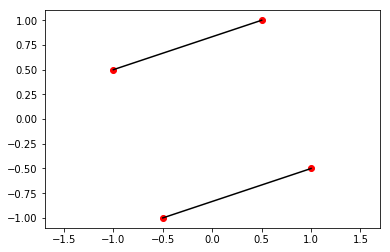

In [2]:
x=[-1 ,0.5 ,1,-0.5]
y=[ 0.5,  1, -0.5, -1]

plt.plot(x,y, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(x,y,0,1)
connectpoints(x,y,2,3)

plt.axis('equal')
plt.show()

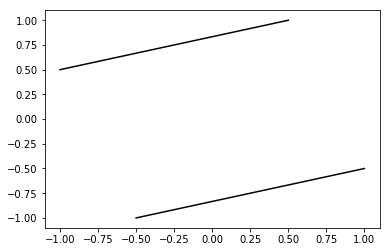

In [3]:
for i in np.arange(0,len(x),2):
    connectpoints(x,y,i,i+1)

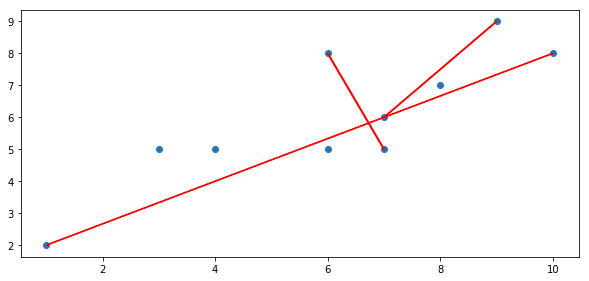

In [4]:
A = np.array([[10,8],[1,2],[7,5],[3,5],[7,6],[8,7],[9,9],[4,5],[6,5],[6,8]])


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(212)

ax0.scatter(A[:,0],A[:,1])


ax0.arrow(A[0][0],A[0][1],A[1][0]-A[0][0],A[1][1]-A[0][1],width=0.02,color='red',head_length=0.0,head_width=0.0)
ax0.arrow(A[2][0],A[2][1],A[9][0]-A[2][0],A[9][1]-A[2][1],width=0.02,color='red',head_length=0.0,head_width=0.0)
ax0.arrow(A[4][0],A[4][1],A[6][0]-A[4][0],A[6][1]-A[4][1],width=0.02,color='red',head_length=0.0,head_width=0.0)


plt.show()

### 4.2: Adding Text to Your Plots

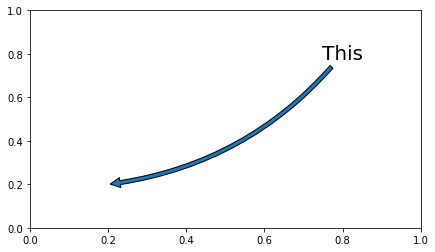

In [17]:
plt.figure(1, figsize=(7,4))
ax = plt.subplot(111)

ax.annotate("This",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"), 
            )

plt.show()

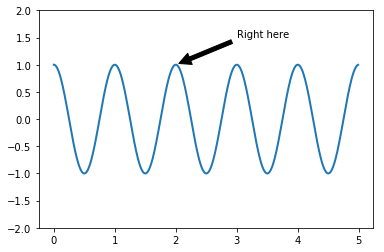

In [18]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('Right here', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)
plt.show()

### 4.3: Playing with Polygons and Shapes

In [19]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

In [20]:
np.random.seed(19680801)

resolution = 50  # the number of vertices

N = 3
x = np.random.rand(N)
y = np.random.rand(N)

radii = 0.1*np.random.rand(N)

patches = []

for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))

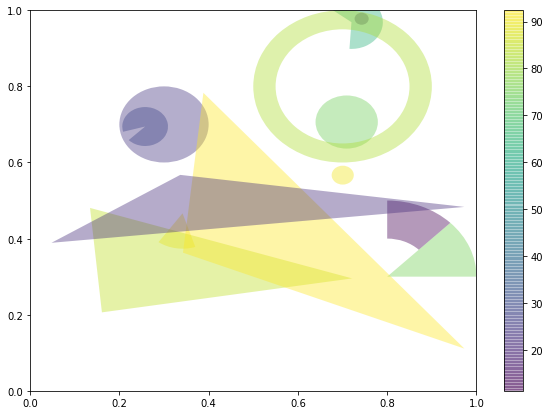

In [21]:
fig, ax = plt.subplots(figsize=(10,7))

ax.add_collection(p)

fig.colorbar(p, ax=ax)

plt.show()

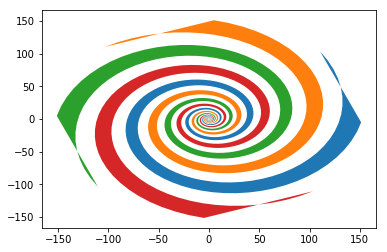

In [24]:
theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()


### 4.4: Versatile Annotating

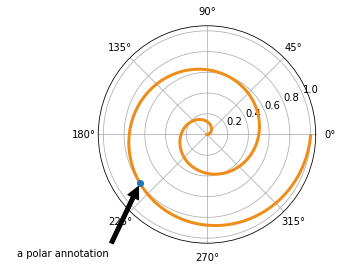

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111, polar=True)

r = np.arange(0,1,0.001)

theta = 2*2*np.pi*r

line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800

thisr, thistheta = r[ind], theta[ind]

ax.plot([thistheta], [thisr], 'o')

ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

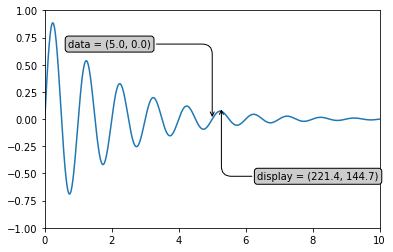

In [23]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()
